# La tua prima classificazione
La classificazione è, insieme alla regressione, uno dei due problemi principali dell'apprendimento supervisionato, la branca del machine learning che si occupa di insegnare ai computer come risolvere problemi mostrandogli esempi di come questi sono già stati risolti in passato.
<br><br>
Matematicamente il problema dell'apprendimento supervisionato può essere a ridotto a: ho una o più variabil indipendenti x e una varibile dipendente y, devo trovare una funzione f tale che f(x) sia uguale a y. Niente di più, niente di meno.
<br><br>
In gergo tecnico l'insieme delle varibili indipendenti x vengono chiamate features e la varibile y viene chiamata target.
<br>
La differenza principale tra regressione e classificazione è:
 - In un problema di regressione la variabile y è continua (cioè un numero).
 - In un problema di classificazione la variabile y è categoria, ovvero un insieme finito di valori, i cosidetti labels, che solitamente rappresentano l'appartenenza ad una classe.
<br>

Alcuni problemi che possono essere affrontati con un modello di classificazione sono ad esempio:
 - Riconoscere oggetti nelle foto.
 - Effettuare diagnosi cliniche.
 - Comprendere lo stato d'animo di una persona da un tweet.
 
Per un semplice problema di classificazione con due features e due classi, il problema può essere rappresentato geometricamente come trovare l'equazione della retta che meglio riesce a dividere le due classi.
<img src="https://github.com/ProfAI/ml00/raw/5bde399f10eac6a1b2e49c2fd196289d808ee494/5%20-%20Classificazione/res/classification.png"/>
Quando le classi da predire sono solo 2 si parla di classificazione binaria, in questi casi il modello non fa altro che rispondere con un si o con un no
 - E' un gatto nella foto ? SI/NO
 - Ha il paziente la varicella ? SI/NO
 - La persona che ha scritto questo tweet è incazzata ? SI/NO

<br><br>
In questo articolo proveremo a eseguire una classificazione binaria per classificare tumori al seno come benigni o maligni, basandoci su alcune  proprietà estratte da immagini digitalizzate. A questo scopo utilizzeremo il [Wisconsis Breast Cancer Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). 
<br><br>
**Partiamo !**
<br><br>
Per prima cosa importiamo i vari moduli che ci serviranno.
- **Numpy**: la libreria Python per il calcolo numerico.
- **Pandas**: libreria Python per analisi e manipolazione di dati.
- **Matplotlib**: una libreria Python che permette di creare grafici e visualizzazioni con poche righe di codice.
- **scikit-learn**: una libreria Python che contiene classi per il preprocessing dei dati e la creazione di modelli di machine learning.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss 

Utilizzando <span style="font-family: Monaco">Pandas</span>
 importiamo il dataset direttamente dalla repo all'interno di un **<span style="font-family: Monaco">DataFrame</span>**, una speciale struttura dati che permette di immagazzinare dati in maniera tabulare.
<br>
Purtroppo ci tocca definire manualmente i nomi di tutte le colonne.

In [2]:
breast_cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                           names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])

breast_cancer.head() #visualizziamo le prime 5 righe

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Tramite il metodo <span style="font-family: Monaco">info</span>
 del DataFrame possiamo visualizzare diverse informazioni sulle varie colonne.

In [3]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Il dataset contiene 32 colonne, 1 di queste, diagnosis, è il nostro target, mentre le altre sono potenziali features, tranne id, di questo non ce ne facciamo nulla.<br>
Osserva bene che il tipo di diagnosis è object, mentre tutte le altre colonne contengono numeri.

In [4]:
breast_cancer["diagnosis"].unique()

array(['M', 'B'], dtype=object)

Utilizzando il metodo <span style="font-family: Monaco">unique</span> possiamo osservare gli elementi unici contenuti in diagnosis, come puoi vedere questa è composta da due valori, M e B, che sono dei label indicanti rispettivamente un tumore maligno e uno benigno.

## Classificazione con due features
Siccome il nostro obiettivo è sviluppare un modello semplice, selezioniamo solo due colonne e promuoviamole a features del nostro modello, optiamo per le seguenti:
 - **radius_se**: l'errore standard del raggio del tumore
 - **concave points_worst**: il numero peggiore di punti di concavità nel contorno del tumore.
 
 
 Adesso creiamo due array numpy, uno contenente le features e l'altro il target.

In [5]:
X = breast_cancer[["radius_se","concave points_worst"]].values
Y = breast_cancer['diagnosis'].values

Per poter valutare la qualità del nostro modello dobbiamo suddividere il nostro dataset in 2 set differenti:
 - **un train set**: che ci servirà per addestrare il modello.
 - **un test set**: che ci servirà per testarlo.
 
 
 Questa suddivisione è necessaria per verificare che il modello abbia effettivamente imparato qualcosa e che sia in grado di generalizzare su dati non visti durante l'addestramento.<br><br>.
Possiamo eseguire la suddivisione utilizzando la funzione train_test_split, assegnando il 70% dei dati al train set e il 30% al test set.

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

Ricorderai che la colonna diagnosis contiene dei caratteri, ma a noi servono dei numeri !<br>
Una tecnica da adoperare in questi casi è codificare gli oggetti sotto forma di numeri, nel nostro caso la codifica che andremo a fare è la seguente:
- **M => Classe positiva = 1**
- **B => Classe negativa = 0**


Per farlo possiamo utilizzare la classe LabelEncoder.
LabelEncoder appartiene alla categoria dei trasformatori di scikit-learn, che si occupano di eseguire trasformazioni i dati.
Un trasformatore viene inizializzato con il metodo fit, che si occupa di effettuare tutti i calcoli necessari per poter eseguire la trasformazione utilizzando il metodo transform.

In [7]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)
np.unique(Y_test)

array([0, 1])

Come vedi i caratteri sono stati codificati in numeri, la funzione <span style="font-family: Monaco">unique</span> usata qui è l'equivalente di numpy del metodo <span style="font-family: Monaco">unique</span> del DataFrame che abbiamo usato prima.


La classe <span style="font-family: Monaco">fit_transform</span>
 è una scorciatoia che equivale a chiamare prima <span style="font-family: Monaco">fit</span>
 e poi <span style="font-family: Monaco">transform</span>
 sui dati passati come parametro.
 <br><br>
 Prima di costruire un modello bisogna essere sicuri che i dati siano sulla stessa scala, altrimenti si rischia che questo attribuisca maggiore importanza alle features con magnitudine maggiore.
 <br>
 Riprendiamo un momento il nostro DataFrame, selezioniamo solo le nostre due features e utilizziamo il metodo describe per ottenere le informazioni statistiche (in alternativa avremmo potuto utilizzare le funzioni np.min e np.max sui nostri array numpy)

In [8]:
breast_cancer[["radius_se","concave points_worst"]].describe()

,radius_se,concave points_worst
count,569.000000,569.000000
mean,0.405172,0.114606
std,0.277313,0.065732
min,0.111500,0.000000
25%,0.232400,0.064930
50%,0.324200,0.099930
75%,0.478900,0.161400
max,2.873000,0.291000


Osservando i valori minimi e massimi delle due colonne puoi vedere che la colonna <span style="font-family: Monaco">radius_se</span> si trova in un range di valore 10 volte superiore rispetto a <span style="font-family: Monaco">concave points_worst<span>.<br>
Per portare le features su di una scala comune abbiamo due possibilità:
 - **Normalizzare**: portare tutti i dati in un range compreso tra 0 e 1.
 - **Standardizzare**: creare una distribuzione normale, cioè con media 0 e deviazione standard 1.
  
  
Optiamo per la standardizzazione, possiamo eseguirla utilizzando la classe trasformatore <span style="font-family: Monaco">StandardScaler</span> di scikit-learn.

In [9]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Adesso siamo pronti per creare il nostro modello di classificazione, il modello che implementeremo è la regressione logistica, che oltre alla classe di appartenenza ritorna anche la probabilità di quanto la classificazione sia corretta.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Abbiamo il nostro modello ! E ora ?<br>
Adesso dobbiamo valutare quanto effettivamente sia buono, per farlo possiamo utilizzare il test set e due metriche:
 - **Accuracy:** semplicemente conta quante delle classificazioni fatte dal modello sono corrette, ritorna un valore tra 0 e 1, maggiore è meglio
 - **Negative Log-likelihood (log loss)**:  tiene conto della probabilità, ritorna un valore tra 0 ed 1, minore è meglio

Entrambe le funzioni sono implementate in scikit-learn

In [11]:
Y_pred = lr.predict(X_test)
Y_pred_proba = lr.predict_proba(X_test)

print("ACCURACY: "+str(accuracy_score(Y_test, Y_pred)))
print("LOG LOSS: "+str(log_loss(Y_test, Y_pred_proba)))

ACCURACY: 0.9064327485380117
LOG LOSS: 0.21553789916301566


Trattandosi di un modello estremamente semplice, con sole due features, i risultati non sono malvagi.
<br>
Visualizziamo cosa il modello ha imparato all'interno di un grafico.

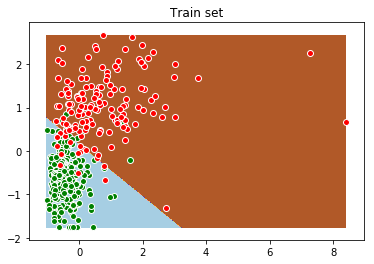

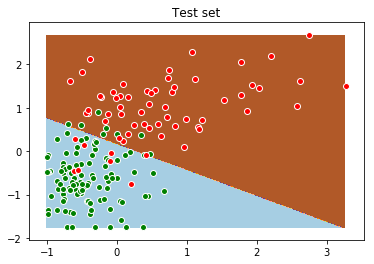

In [12]:
def showBounds(X,Y,model,title=None):
    
    h = .02 

    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    X_m = X[Y==1]
    X_b = X[Y==0]
    plt.title(title)
    plt.scatter(X_b[:, 0], X_b[:, 1], c="green",  edgecolor='white')
    plt.scatter(X_m[:, 0], X_m[:, 1], c="red",  edgecolor='white')
    plt.show()

    
showBounds(X_train, Y_train, lr, title="Train set")
showBounds(X_test, Y_test, lr, title="Test set")

## Classificazione con tutte le feature
Vediamo un pò cosa accade sfruttando tutte le colonne del dataset originale come features.<br>

In [13]:
X = breast_cancer.drop('diagnosis',axis=1).values
Y = breast_cancer['diagnosis'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)
Y_pred_proba = lr.predict_proba(X_test)

print("ACCURACY: "+str(accuracy_score(Y_test, Y_pred)))
print("LOG LOSS: "+str(log_loss(Y_test, Y_pred_proba)))

ACCURACY: 0.9649122807017544
LOG LOSS: 0.11057476772558374


Avendo più informazioni a disposizione, il modello addestrato con tutte le proprietà è notevolmente migliore.